# Domain Overview
The FIFA 20 dataset belongs to the sports analytics domain, specifically focusing on football (soccer). It contains detailed information about players, their physical attributes, skill ratings, and other performance metrics. The dataset is used to analyze player performance, predict player ratings, and identify patterns or clusters of players based on their attributes.

# Key Concepts in the Domain
Player Attributes: Physical and skill-based attributes such as age, height, weight, pace, shooting, passing, dribbling, defending, and physicality.

Player Ratings: Overall rating and potential rating, which are key metrics for evaluating a player's current and future performance.

Nationality and Club: The country a player represents and the club they play for, which can influence their performance and market value.

Position and Role: The player's position on the field (e.g., forward, midfielder, defender, goalkeeper) and their specific role (e.g., striker, center-back, winger).

Skill Moves and Weak Foot: Indicators of a player's technical abilities and versatility.

Value and Wage: The market value and weekly wage of a player, which reflect their importance and demand in the football market.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv("players_20.csv")
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [5]:
# Display the first few rows of the dataset
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [7]:
df.shape

(18278, 104)

In [8]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [9]:
# Summary statistics
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [10]:
# Check for missing values
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [11]:
# Save the cleaned dataset
df.to_csv('cleaned_fifa20.csv', index=False)

In [12]:
# Selecting relevant attributes for clustering
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Dropping rows with missing values in selected attributes
df_cluster = df.dropna(subset=attributes)[['short_name'] + attributes]

# Standardizing the attributes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster[attributes])

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):  # Checking clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

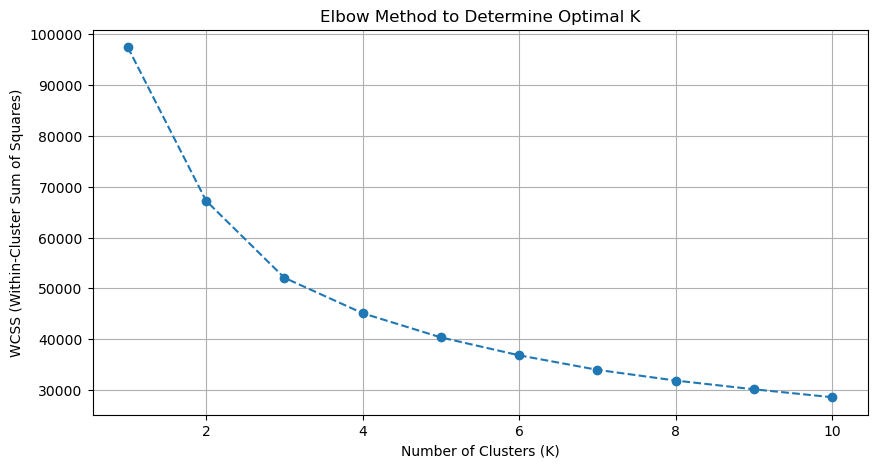

In [13]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)

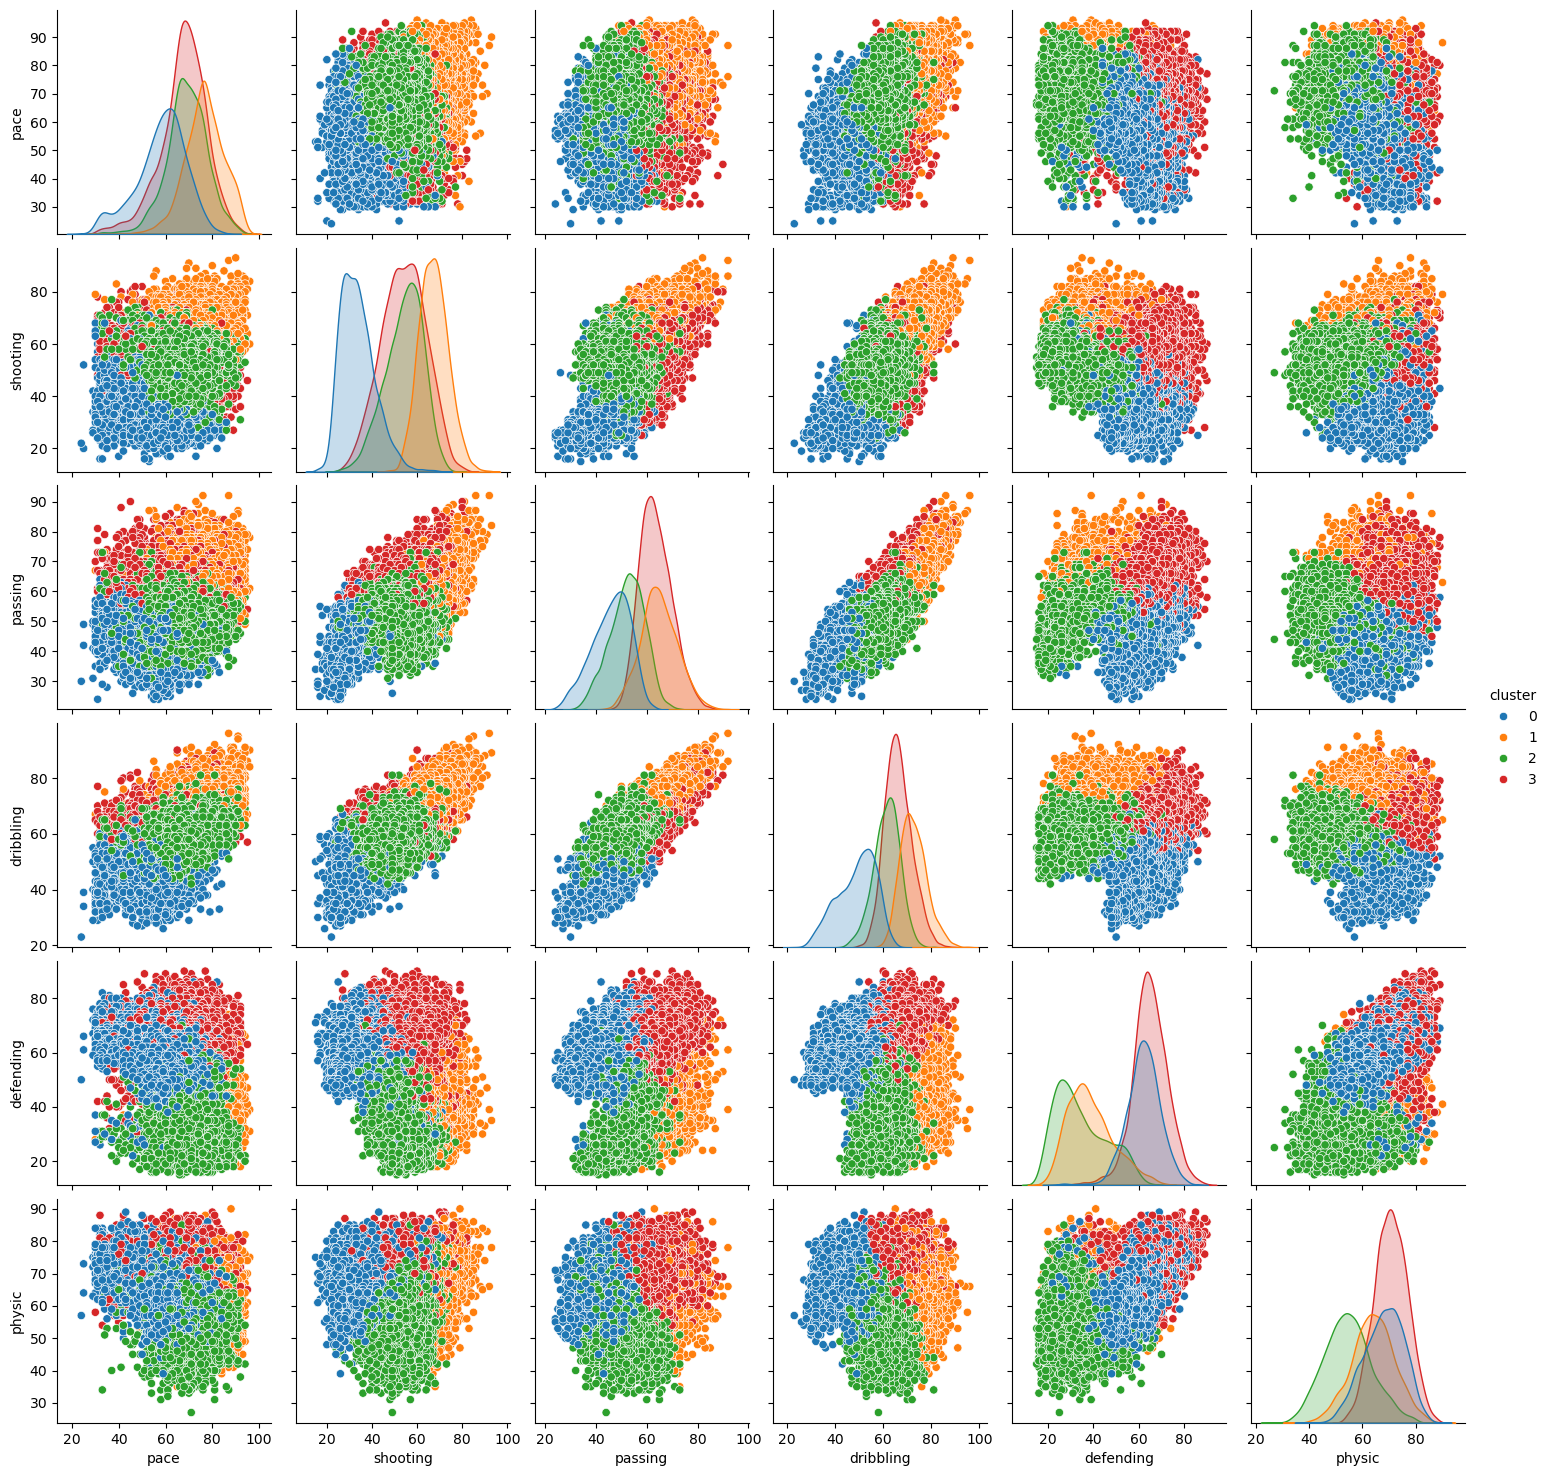

In [14]:
# Using an optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters using pairplot
sns.pairplot(df_cluster, hue='cluster', vars=attributes, palette='tab10', diag_kind='kde')
plt.show()

In [15]:
# Displaying sample players from each cluster
print(df_cluster.groupby('cluster').head(5))

             short_name  pace  shooting  passing  dribbling  defending  \
0              L. Messi  87.0      92.0     92.0       96.0       39.0   
1     Cristiano Ronaldo  90.0      93.0     82.0       89.0       35.0   
2             Neymar Jr  91.0      85.0     87.0       95.0       32.0   
4             E. Hazard  91.0      83.0     86.0       94.0       35.0   
5          K. De Bruyne  76.0      86.0     92.0       86.0       61.0   
7           V. van Dijk  77.0      60.0     70.0       71.0       90.0   
11         K. Koulibaly  71.0      28.0     54.0       67.0       89.0   
15             N. Kanté  78.0      65.0     77.0       81.0       87.0   
16         G. Chiellini  68.0      46.0     58.0       60.0       90.0   
18         Sergio Ramos  72.0      68.0     75.0       73.0       87.0   
77              N. Süle  72.0      42.0     55.0       50.0       86.0   
90           K. Manolas  82.0      25.0     42.0       60.0       86.0   
262            S. Savić  55.0      35.

In [16]:
best_player = df.loc[df['overall'].idxmax(), ['short_name', 'overall']]
print(best_player)

short_name    L. Messi
overall             94
Name: 0, dtype: object


In [17]:
fastest_player = df.loc[df['pace'].idxmax(), ['short_name', 'pace']]
print(fastest_player)

short_name    K. Mbappé
pace               96.0
Name: 10, dtype: object


In [18]:
top_dribblers = df[['short_name', 'dribbling']].nlargest(5, 'dribbling')
print(top_dribblers)

        short_name  dribbling
0         L. Messi       96.0
2        Neymar Jr       95.0
4        E. Hazard       94.0
41  Bernardo Silva       92.0
48      D. Mertens       91.0


# -------------------------------problem statement--------------------------------

# ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

In [21]:
# Calculate the average overall rating per age
avg_rating_by_age = df.groupby('age')['overall'].mean()

# Find the peak age (age with the highest average overall rating)
peak_age = avg_rating_by_age.idxmax()

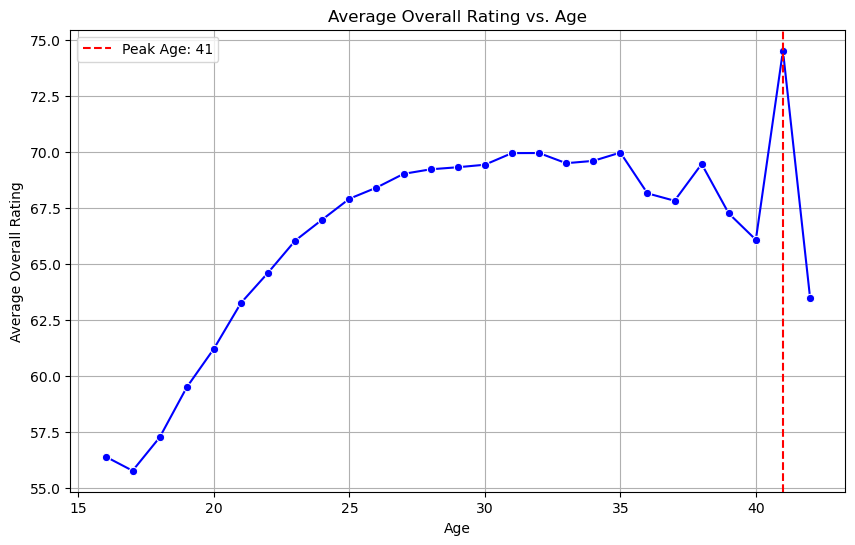

Players tend to peak around age 41.


In [22]:
# Plot the average overall rating vs. age
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_rating_by_age.index, y=avg_rating_by_age.values, marker='o', color='b')
plt.title('Average Overall Rating vs. Age')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')
plt.grid(True)

# Highlight the peak age
plt.axvline(x=peak_age, color='r', linestyle='--', label=f'Peak Age: {peak_age}')
plt.legend()

plt.show()

# Print the peak age
print(f"Players tend to peak around age {peak_age}.")

# ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

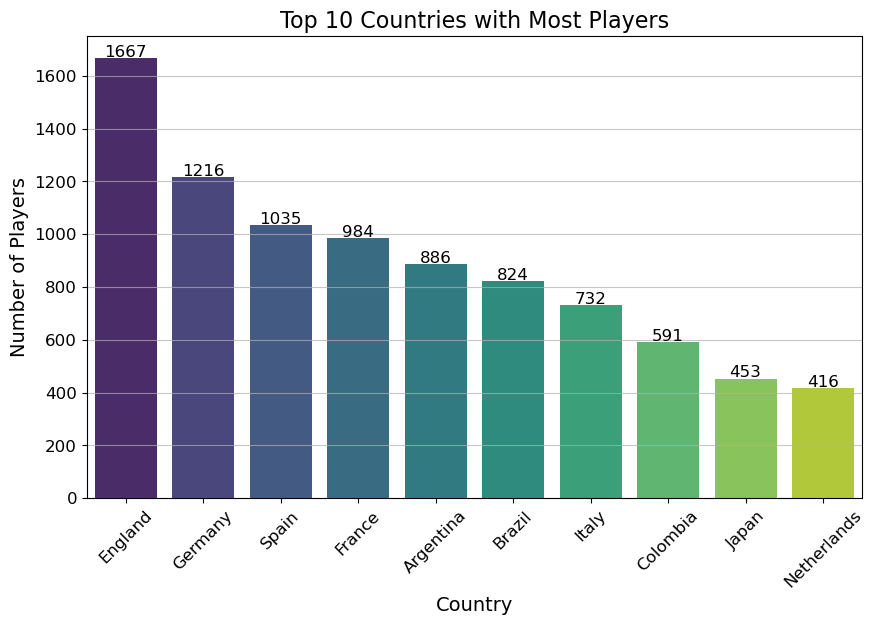

In [24]:
top_countries = df['nationality'].value_counts().head(10)
# Plot the top 10 countries with data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Countries with Most Players', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)

# Add data labels
for i, value in enumerate(top_countries.values):
    ax.text(i, value + 5, str(value), ha='center', fontsize=12)
plt.show()

# ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

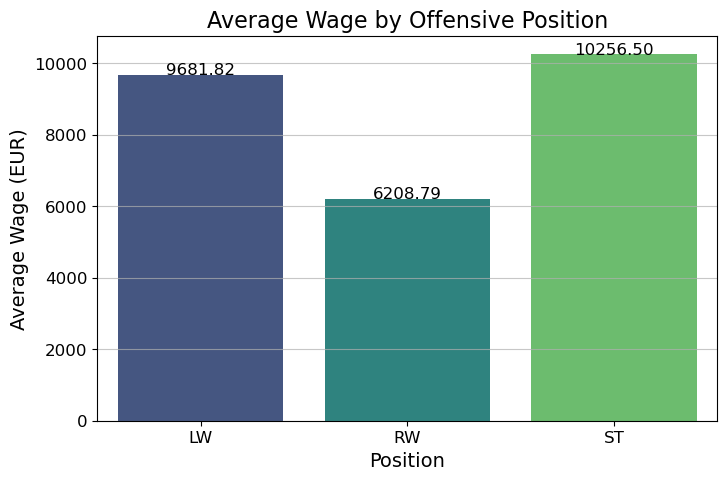

The offensive position that tends to get paid the most is ST with an average wage of 10256.50 EUR.


In [26]:
# Filter the dataset for offensive players (ST, RW, LW)
offensive_players = df[df['player_positions'].isin(['ST', 'RW', 'LW'])]

# Calculate the average wage for each position
avg_wage_by_position = offensive_players.groupby('player_positions')['wage_eur'].mean()

# Plot the average wage by offensive position with data labels
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=avg_wage_by_position.index, y=avg_wage_by_position.values, hue=avg_wage_by_position.index, palette='viridis', legend=False)
plt.title('Average Wage by Offensive Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Wage (EUR)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)

# Add data labels
for i, value in enumerate(avg_wage_by_position.values):
    ax.text(i, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)  # Format to 2 decimal places
plt.show()

# Determine which offensive position tends to get paid the most
highest_paid_position = avg_wage_by_position.idxmax()
highest_paid_wage = avg_wage_by_position.max()

# Print the result
print(f"The offensive position that tends to get paid the most is {highest_paid_position} with an average wage of {highest_paid_wage:.2f} EUR.")

# Model Comparison Report

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Selecting relevant features and target variable
target = "overall"
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

df = df.dropna(subset=features + [target])  # Drop rows with missing values

In [30]:
# Splitting data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)}

In [33]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)}

In [34]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE      RMSE  R2 Score
Linear Regression  2.958068  3.677224  0.710469
Decision Tree      1.390890  1.851771  0.926578
Random Forest      0.990289  1.284148  0.964691
XGBoost            1.012134  1.313925  0.963035


<Figure size 1000x500 with 0 Axes>

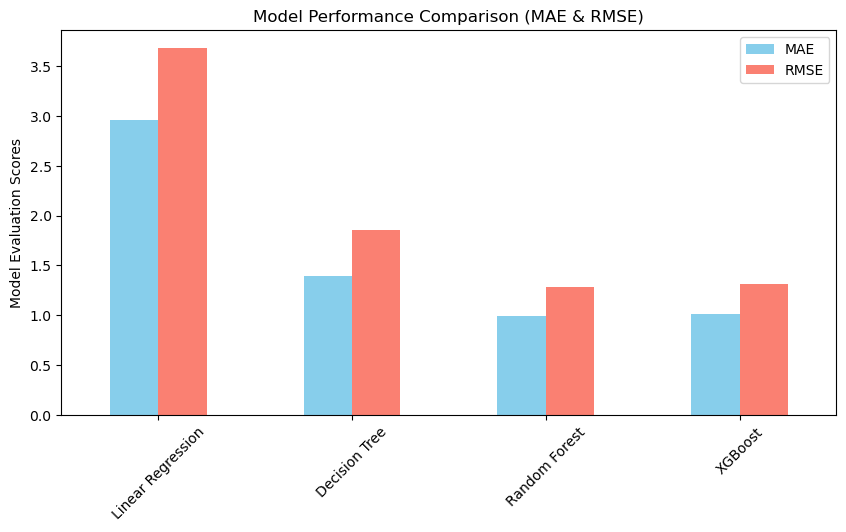

In [35]:
# Plot MAE & RMSE for comparison
plt.figure(figsize=(10, 5))
results_df[['MAE', 'RMSE']].plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'])
plt.title("Model Performance Comparison (MAE & RMSE)")
plt.ylabel("Model Evaluation Scores")
plt.xticks(rotation=45)
plt.legend(["MAE", "RMSE"])
plt.show()

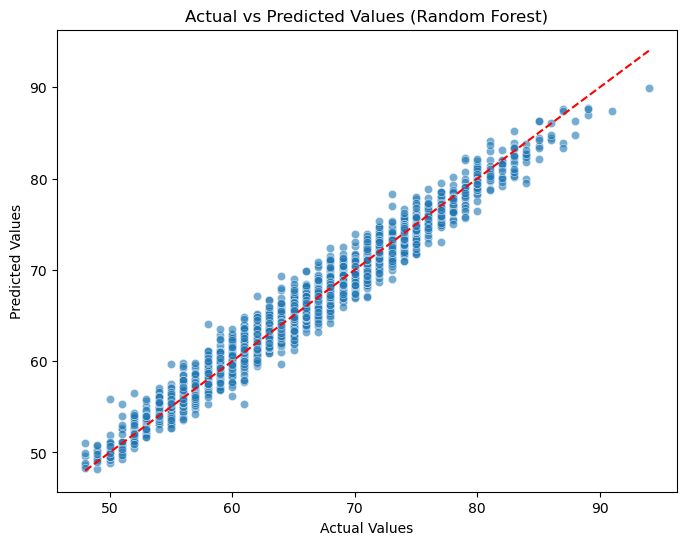

Best model for production: Random Forest


In [36]:
# Identify the best model based on R² Score
best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]

# Get predictions
y_pred_best = best_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values ({best_model_name})")
plt.show()
print(f"Best model for production: {best_model_name}")

#                                  CHALLENGES FACED AND SOLUTIONS USED IN FIFA 20 DATA ANALYSIS

1️ . Handling Missing Values
Challenge: Several columns had missing values, which could affect model performance.
Solution : Used `df.dropna()` for strict data cleaning and `df.fillna()` for imputation where necessary.

2️ . Feature Selection
Challenge: The dataset had many columns, making it complex.
Solution : Used `df.corr()` and feature importance techniques to select the most relevant attributes.

3️, Scaling Numerical Data
Challenge: Player attributes were on different scales, affecting regression models.
Solution : Used `StandardScaler()` to normalize features to a uniform scale.

4️ . Categorical Data Encoding
Challenge: Columns like 'nationality' and 'club' were non-numeric, which models cannot process.
Solution : Used `pd.get_dummies()` and `LabelEncoder()` to convert categorical data into numerical values.

5 . Choosing the Best Model
Challenge: Different regression models had varying performance.
Solution : Evaluated models using MAE, RMSE, and R² Score, selecting the best-performing one for production.

`Final Outcome`:  successfull

# CONCLUSION
The FIFA 20 dataset provides a rich source of information for analyzing player performance and team dynamics in the football domain. By leveraging techniques like clustering, regression, and dimensionality reduction, we can gain valuable insights into player attributes, predict future performance, and make data-driven decisions in player scouting and team management. Addressing challenges like high dimensionality and multicollinearity will be crucial for building accurate and reliable models.